In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
src = '../../datalake/bronze/ember/monthly_full_release_long_format.csv'
df = pd.read_csv(src)

In [3]:
df.head()

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
1,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,Clean,%,34.57,NaN,NaN
2,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,Fossil,%,65.44,NaN,NaN
3,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,%,63.40,NaN,NaN
4,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",%,29.08,NaN,NaN


In [4]:
df = df.query('Category == "Electricity demand"')
df.head()

,Area,Country code,Date,Area type,Continent,Ember region,EU,OECD,G20,G7,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Argentina,ARG,2018-01-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,12.77,NaN,NaN
47,Argentina,ARG,2018-02-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,11.77,NaN,NaN
94,Argentina,ARG,2018-03-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,11.62,NaN,NaN
141,Argentina,ARG,2018-04-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,10.86,NaN,NaN
188,Argentina,ARG,2018-05-01,Country,South America,Latin America and Caribbean,0.0,0.0,1.0,0.0,Electricity demand,Demand,Demand,TWh,11.01,NaN,NaN


In [5]:
countries = ['Argentina', 'Chile', 'Ecuador', 'Spain', 'Mexico']
df2 = df[df.Area.isin(countries)]

In [6]:
df2.columns

Index(['Area', 'Country code', 'Date', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')

In [7]:
df3 = df2.groupby(['Area', 'Date'])['Value'].sum()
df3

Area       Date      
Argentina  2018-01-01    12.77
           2018-02-01    11.77
           2018-03-01    11.62
           2018-04-01    10.86
           2018-05-01    11.01
                         ...  
Spain      2022-06-01    22.44
           2022-07-01    25.40
           2022-08-01    24.43
           2022-09-01    22.68
           2022-10-01    21.38
Name: Value, Length: 322, dtype: float64

In [8]:
df3 = df3.reset_index()

(0.0, 30.0)

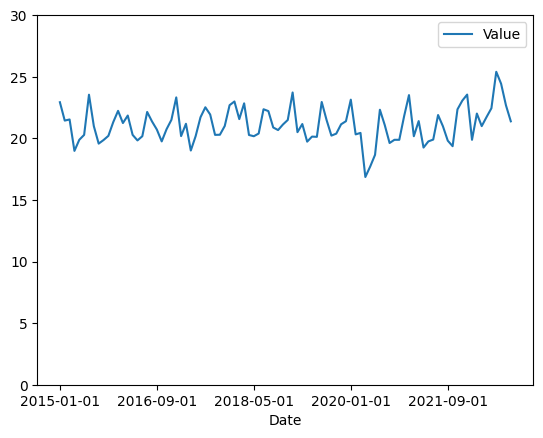

In [9]:
df4 = df3[df3.Area == "Spain"][['Date', 'Value']].set_index('Date')
df4.plot(label='Espanha')
plt.ylim(0, 30)

In [10]:
df5.index >= '2020-01-01'

NameError: name 'df5' is not defined

In [11]:
df3['Date'] = pd.to_datetime(df3.Date)

In [12]:
df3 = df3.set_index("Date")
df3.head()

,Area,Value
Date,,
2018-01-01,Argentina,12.77
2018-02-01,Argentina,11.77
2018-03-01,Argentina,11.62
2018-04-01,Argentina,10.86
2018-05-01,Argentina,11.01


In [13]:
df3 = df3[(df3.index >= '2019-01-01') & (df3.index <= '2021-12-31')]
df3.head()

,Area,Value
Date,,
2019-01-01,Argentina,12.12
2019-02-01,Argentina,11.06
2019-03-01,Argentina,10.47
2019-04-01,Argentina,9.89
2019-05-01,Argentina,10.78


In [14]:
df3 = df3.reset_index()
df3.columns = ['Data', 'País', 'Demanda (TWh)']
df3

,Data,País,Demanda (TWh)
0,2019-01-01,Argentina,12.12
1,2019-02-01,Argentina,11.06
2,2019-03-01,Argentina,10.47
3,2019-04-01,Argentina,9.89
4,2019-05-01,Argentina,10.78
...,...,...,...
175,2021-08-01,Spain,20.98
176,2021-09-01,Spain,19.81
177,2021-10-01,Spain,19.36
178,2021-11-01,Spain,22.35


In [15]:
df3['País'].replace({'Spain':'Espanha', 'Mexico':'México', 'Ecuador':'Equador'}, inplace=True)
df3.to_csv('demanda_energia.csv', index=False)

In [19]:
df3.head()

,Data,País,Demanda (TWh)
0,2019-01-01,Argentina,12.12
1,2019-02-01,Argentina,11.06
2,2019-03-01,Argentina,10.47
3,2019-04-01,Argentina,9.89
4,2019-05-01,Argentina,10.78


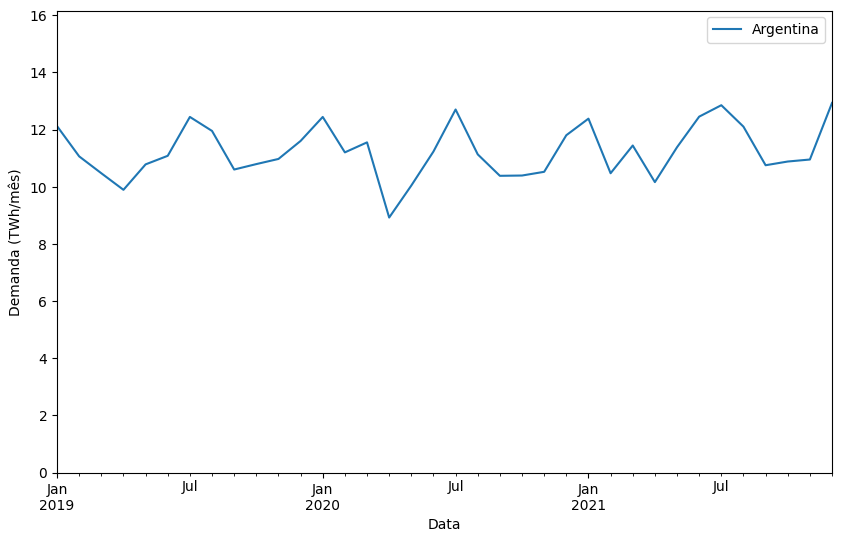

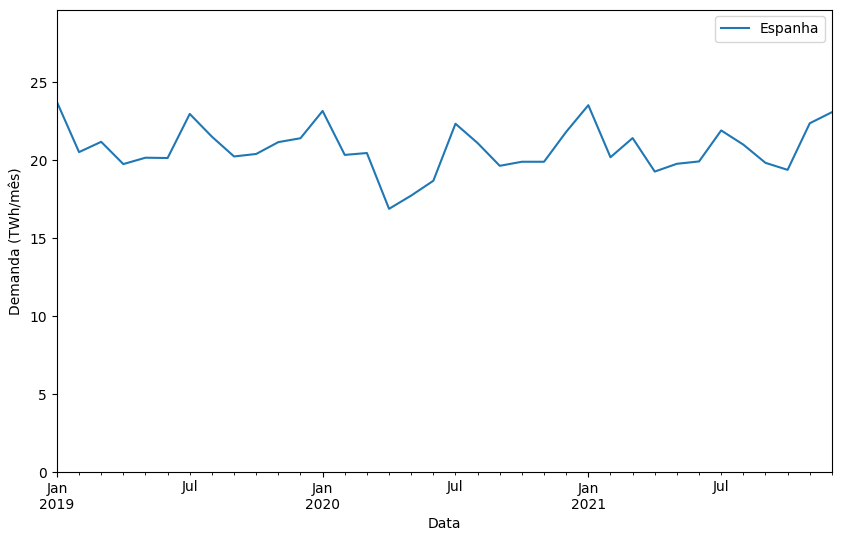

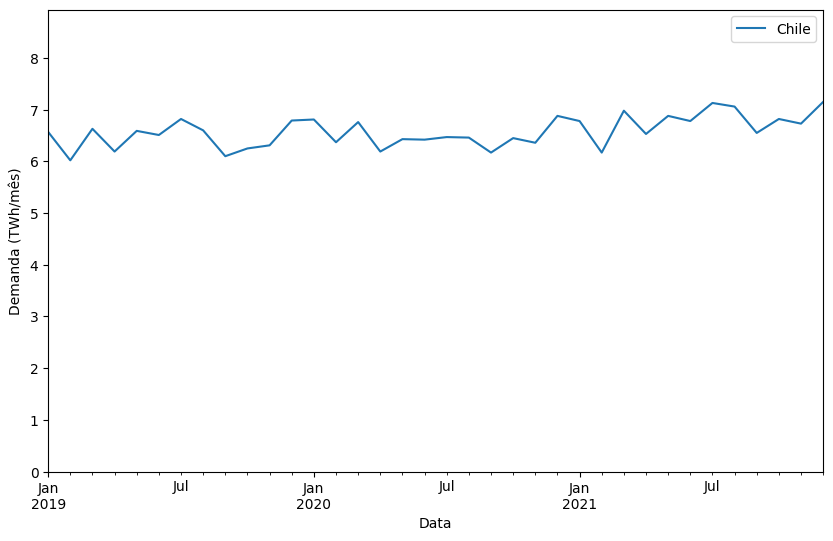

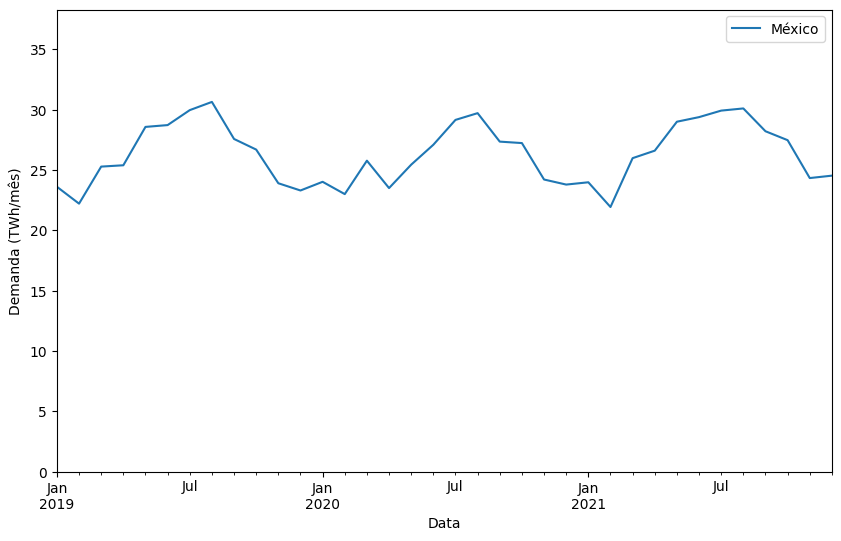

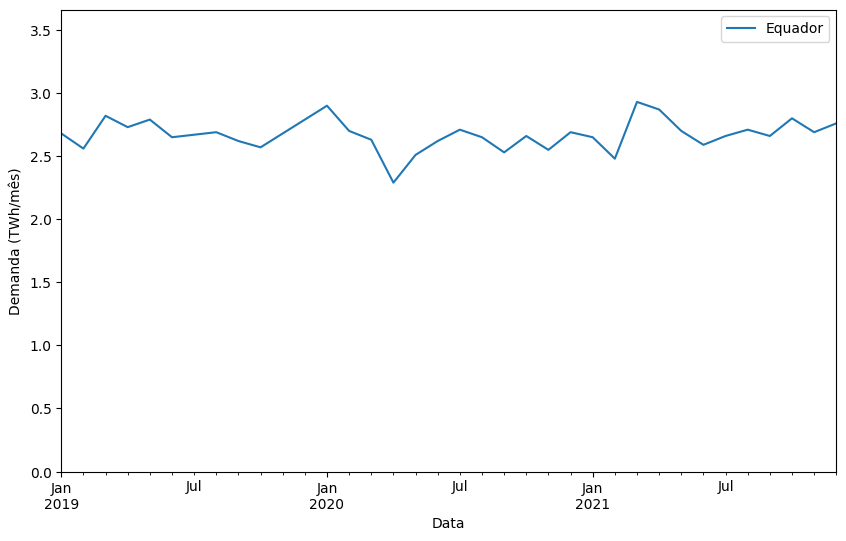

In [22]:
for country in ['Argentina', 'Espanha', 'Chile', 'México', 'Equador']:
    fig, ax = plt.subplots(1, figsize=(10,6))
    df5 = df3[df3['País'] == country][['Data', 'Demanda (TWh)']].set_index('Data')
    df5[(df5.index >= '2019-01-01') & (df5.index <= '2021-12-31')].plot(label=country, ax=ax)
    plt.ylim(0, df5['Demanda (TWh)'].max()*1.25)
    ax.legend([country])
    ax.set_ylabel('Demanda (TWh/mês)')
plt.show()
